# Random Variables in a Vector Space

Given 3 random variables, A, B and C, and corr(A,B) = 0.5 whilst corr(B,C) = 0.7. What values can corr(A,C) take?

## A vector space of R.V.s 

If we propose a vector space, where the 'vectors' are real random variables, we can see the normal conditions for a vector space hold, for example there is a zero element - the constant random variable, $\mathcal{Z}$, that takes the value 0 with probability 1. For example, $X + \mathcal{Z} = X$ for all X.

The norm of this space is given by $||X||^2 = E[(X-E[X])^2]$, which implies an inner product; 

$X \cdot Y = cov(X - E[X], Y - E[Y])$

Now, most importantly, we can represent the inner product as:
$X \cdot Y = cov(X - E[X], Y - E[Y]) = ||X|| \ ||Y|| \ corr(X - E[X], Y - E[Y])$

So the angle between two vectors is $arccos(corr(X - E[X], Y - E[Y]))$, given by the traditional formula for the inner product of two vectors; $X \cdot Y = ||X|| \ ||Y|| \ cos(\theta)$

## Back to the question

We can now identify a way to actually solve this - if we don't look at this in some framework (this isn't the only approach we could take), it can be hard to work out how to tackle it!

We essentially now just have to solve the simpler problem - "The angle between A and B is $\theta_1$ and the angle between B and C is $\theta_2$. What is the range of angles possible between A and C?"

Well, this is straight forward. One extreme is :

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

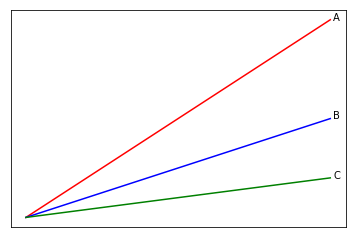

This corresponds to the maximum possible angle between A and C. The other extreme is:


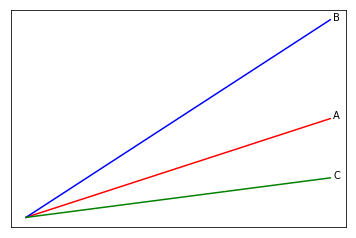

So we can compute these two extremes explicitly:

In [4]:
max_corr = np.cos(np.arccos(0.5) - np.arccos(0.7))
max_corr

0.9684658438426491

In [5]:
min_corr = np.cos(np.arccos(0.5) + np.arccos(0.7))
min_corr

-0.2684658438426493

## Another approach

We can check this using an alternative approach: A valid correlation matrix should be positive semi definite. This means the eigenvalues must be 0 or above:

positive semi-definite definition: $\mathbf{x}^{T}\mathbf{A}\mathbf{x} \geq 0$<br/>
Eigenvalue equation: $\mathbf{A}\mathbf{x}  = \lambda \mathbf{x}$

$\mathbf{x}^{T}\mathbf{A}\mathbf{x} = \lambda \mathbf{x}^{T}\mathbf{x}$

$\lambda \mathbf{x}^{T}\mathbf{x} \geq 0$ if and only if $\lambda \geq 0$ for all $\mathbf{x}$.

In [6]:
eps = 1e-8
a = np.array([[1.0, 0.5, max_corr-eps],
         [0.5, 1.0, 0.7],
         [max_corr-eps, 0.7, 1.0],])

ap = np.array([[1.0, 0.5, max_corr+eps],
         [0.5, 1.0, 0.7],
         [max_corr+eps, 0.7, 1.0],])

In [7]:
print(np.min(np.linalg.eigvals(a)))
print(np.min(np.linalg.eigvals(ap)))

9.355995189059583e-09
-9.355994982380063e-09


In [8]:
b = np.array([[1.0, 0.5, min_corr-eps],
         [0.5, 1.0, 0.7],
         [min_corr-eps, 0.7, 1.0],])

bp = np.array([[1.0, 0.5, min_corr+eps],
         [0.5, 1.0, 0.7],
         [min_corr+eps, 0.7, 1.0],])

In [9]:
print(np.min(np.linalg.eigvals(b)))
print(np.min(np.linalg.eigvals(bp)))

-5.6534439352162735e-09
5.653443713171669e-09


Whilst this is not quite so rigorous - we can see that both of these values mark points where one of the eigenvalues becomes 0, and hence is a border between positive semi-definite and not positive semi-definite. Solving it analytically this way is a bit trickier, as its a 3rd order equation, but is of course possible numerically.